## 모델

In [7]:
from sklearn.model_selection import train_test_split

In [1]:
df = pd.read_csv('./MACH_data/cut_off_by_max.csv')
df.head()

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,3.0,6.0,21.0,3.0,7.0,19.0,5.0,20.0,15.0,2.0,...,Christian(othrer),Heterosexual,Black,Yes,Currently married,5,75.0,35.0,33.0,7.0
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
2,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,...,Atheist,Bisexual,Asian,No,Never married,2,98.0,43.0,45.0,10.0
3,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
4,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0


In [50]:
df["familysize"].value_counts()

2     26735
3     16163
1     10155
4      6915
5      2735
0      1781
6      1155
7       555
8       314
9       163
10       83
11       50
12       37
14       15
13       13
15        9
44        3
17        3
20        3
16        2
18        1
21        1
23        1
67        1
24        1
30        1
34        1
48        1
Name: familysize, dtype: int64

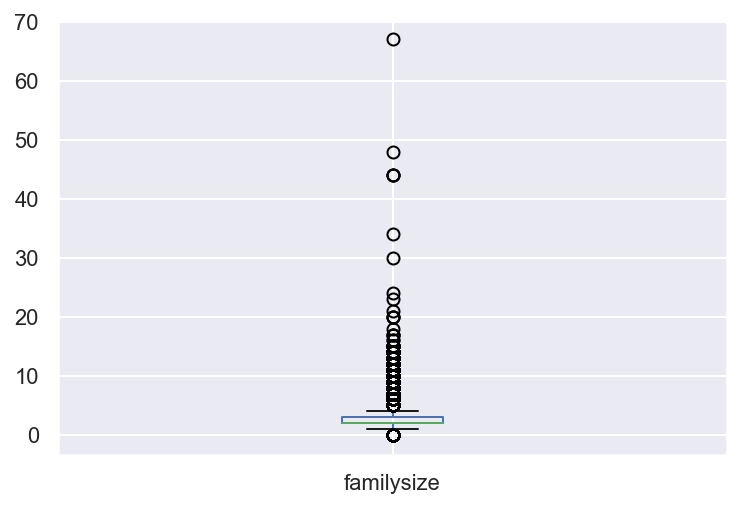

In [24]:
df['familysize'].plot(kind='box')

In [29]:
tmp = [1]*len(df.familysize.value_counts())

In [37]:
list(df["familysize"].values)

[5,
 2,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 5,
 1,
 2,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 3,
 1,
 5,
 2,
 2,
 2,
 2,
 3,
 3,
 5,
 1,
 3,
 0,
 3,
 4,
 4,
 1,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 1,
 5,
 2,
 5,
 0,
 2,
 2,
 6,
 1,
 5,
 3,
 3,
 4,
 2,
 2,
 1,
 3,
 6,
 5,
 3,
 2,
 2,
 3,
 2,
 2,
 3,
 4,
 2,
 3,
 4,
 2,
 2,
 1,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 7,
 5,
 1,
 1,
 1,
 4,
 2,
 5,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 2,
 3,
 1,
 4,
 3,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 4,
 4,
 2,
 4,
 3,
 3,
 3,
 2,
 2,
 4,
 2,
 4,
 2,
 0,
 2,
 1,
 2,
 4,
 3,
 2,
 1,
 2,
 4,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 1,
 3,
 3,
 3,
 5,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 1,
 3,
 4,
 4,
 5,
 3,
 2,
 4,
 2,
 1,
 5,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 10,
 3,
 2,
 3,
 2,
 4,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 4,
 4,
 1,
 3,
 5,
 4,
 3,
 3,
 3,
 4,
 4,
 2,
 8,
 8,
 3,

In [40]:
samples = list(df["familysize"].values)
tmp_y = [1]*len(samples)

<function matplotlib.pyplot.show(*args, **kw)>

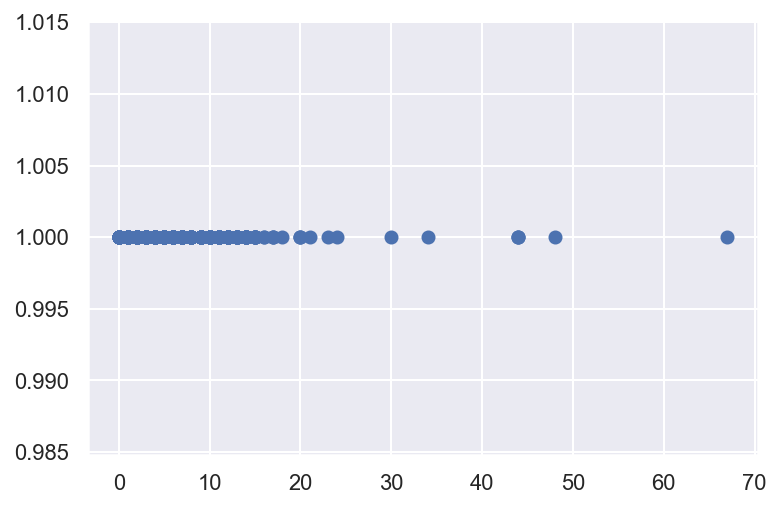

In [41]:
plt.scatter(samples, tmp_y)
plt.show

In [ ]:
np.mean()

In [42]:
np.median(samples)

2.0

In [44]:
np.percentile(samples, 25)

2.0

In [45]:
np.percentile(samples, 75)

3.0

In [46]:
np.percentile(samples, 75) - np.percentile(samples, 25)

1.0

In [47]:
iqr = np.percentile(samples, 75) - np.percentile(samples, 25)

In [49]:
iqr*1.5

1.5

In [61]:
sorted(pd.DataFrame(df['age'].value_counts()).index)

[13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 90,
 91,
 92,
 99,
 100,
 110]

In [23]:
df['age'].plot(kind='box')

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,3.0,6.0,21.0,3.0,7.0,19.0,5.0,20.0,15.0,2.0,...,Christian(othrer),Heterosexual,Black,Yes,Currently married,5,75.0,35.0,33.0,7.0
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
2,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,...,Atheist,Bisexual,Asian,No,Never married,2,98.0,43.0,45.0,10.0
3,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
4,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66892,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
66893,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
66894,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0
66895,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,Buddhist,Heterosexual,Asian,Yes,Never married,4,53.0,25.0,22.0,6.0


In [8]:
auto_train, auto_test = train_test_split(df, test_size=0.2,
                                          random_state=13)

In [9]:
auto_train.shape, auto_test.shape

((53517, 108), (13380, 108))

### auto ml

In [11]:
from pycaret.classification import *

In [12]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = auto_train, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,8968
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(53517, 108)"
4,Missing Values,False
5,Numeric Features,71
6,Categorical Features,36
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
LGBMClassifier = best_3[1]

In [65]:
tune_LGBMClassifier = tune_model(LGBMClassifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7008,0.7816,0.7487,0.6400,0.6901,0.4043,0.4090
1,0.6925,0.7759,0.7043,0.6405,0.6709,0.3835,0.3850
2,0.6951,0.7775,0.7167,0.6406,0.6765,0.3900,0.3922
3,0.6954,0.7827,0.7185,0.6404,0.6772,0.3907,0.3930
4,0.7064,0.7836,0.7245,0.6531,0.6870,0.4118,0.4138
5,0.7010,0.7796,0.7359,0.6432,0.6865,0.4032,0.4065
6,0.6981,0.7778,0.7293,0.6412,0.6824,0.3969,0.3999
7,0.6962,0.7777,0.7251,0.6398,0.6798,0.3930,0.3957
8,0.6991,0.7840,0.7179,0.6454,0.6797,0.3976,0.3996
9,0.6885,0.7756,0.7125,0.6331,0.6704,0.3770,0.3794


In [71]:
evaluate_model(tune_LGBMClassifier)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

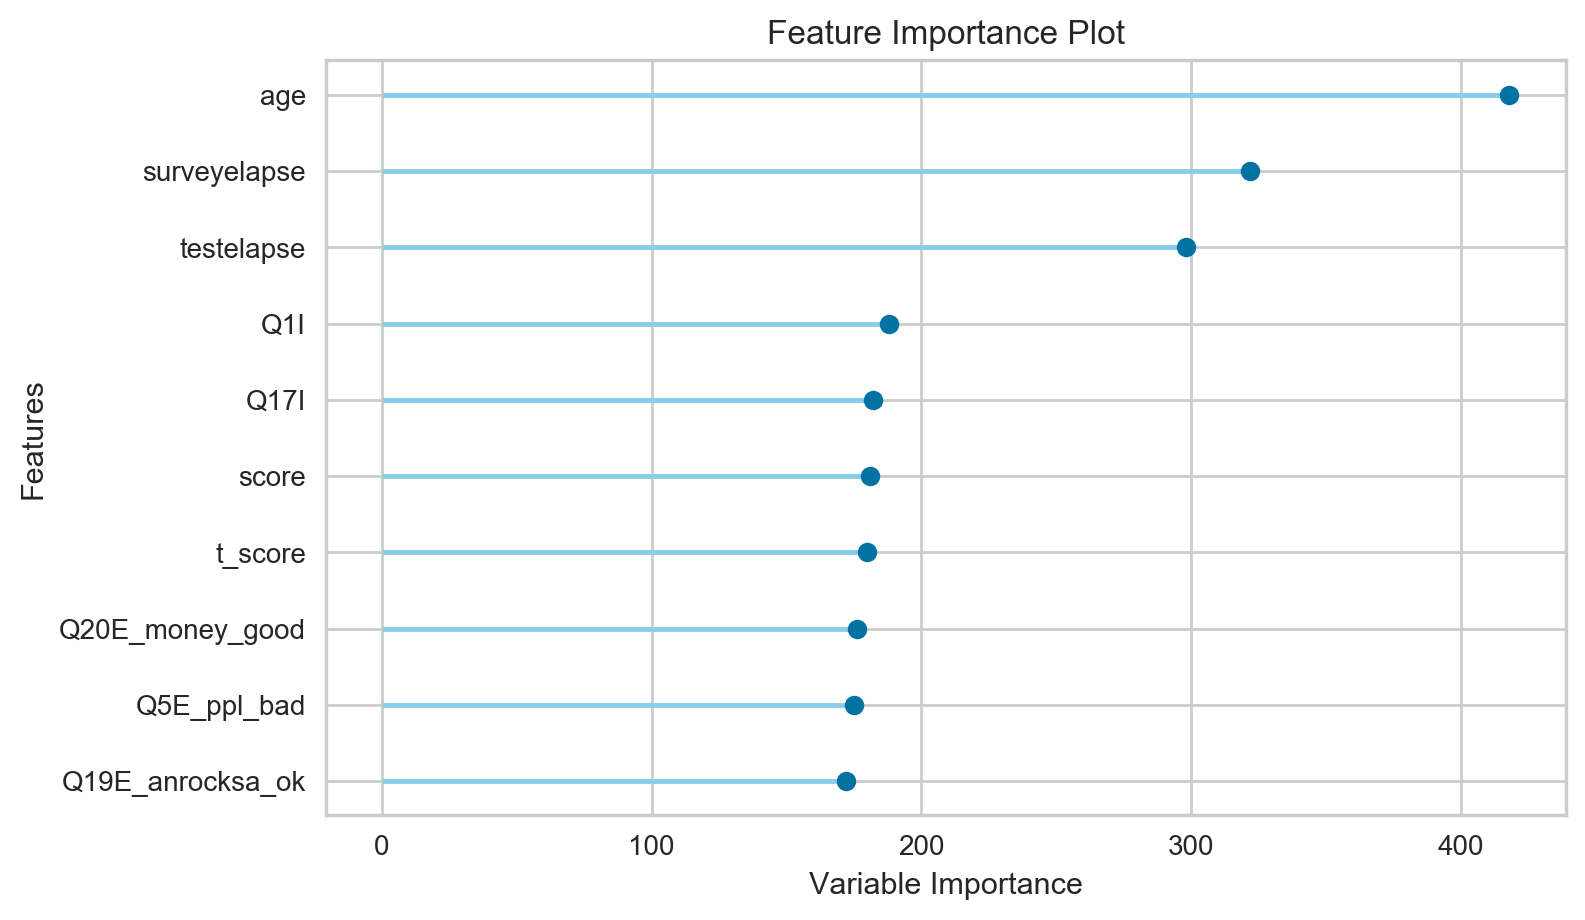

In [70]:
plot_model(estimator = tune_LGBMClassifier, plot = 'feature')

### age 와 voted의 상관관계

### best_3 모델

In [13]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7036,0.7870,0.7346,0.6469,0.6879,0.4078,0.4109,10.9192
1,Light Gradient Boosting Machine,0.6990,0.7834,0.7383,0.6402,0.6857,0.3997,0.4036,1.1791
2,Gradient Boosting Classifier,0.6956,0.7795,0.7412,0.6353,0.6841,0.3938,0.3982,24.0500
3,Ada Boost Classifier,0.6953,0.7763,0.7366,0.6360,0.6825,0.3926,0.3966,6.4958
4,Extreme Gradient Boosting,0.6885,0.7703,0.7005,0.6362,0.6667,0.3757,0.3772,47.5566
5,Linear Discriminant Analysis,0.6913,0.7628,0.6417,0.6566,0.6490,0.3735,0.3736,1.5261
6,Extra Trees Classifier,0.6816,0.7575,0.6179,0.6494,0.6332,0.3523,0.3527,3.0659
7,Random Forest Classifier,0.6421,0.7153,0.5007,0.6212,0.5544,0.2611,0.2654,0.3510
8,Naive Bayes,0.4499,0.6438,0.9813,0.4463,0.6135,0.0050,0.0119,0.1649
9,Logistic Regression,0.5949,0.6200,0.2450,0.5694,0.3253,0.1263,0.1448,0.8875


In [14]:
best_3

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=8968, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
           

### automl 앙상블

In [15]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7011,0.7866,0.7384,0.6427,0.6872,0.4036,0.4071
1,0.7032,0.7878,0.7423,0.6444,0.6899,0.4079,0.4117
2,0.7074,0.7898,0.7407,0.6502,0.6925,0.4157,0.4189
3,0.7038,0.7855,0.7557,0.6419,0.6941,0.4107,0.4159
4,0.6995,0.7843,0.7377,0.6409,0.6859,0.4007,0.4043
Mean,0.7030,0.7868,0.7429,0.6440,0.6899,0.4077,0.4116
SD,0.0027,0.0019,0.0066,0.0033,0.0031,0.0053,0.0054


In [16]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7015,0.786,0.738,0.6434,0.6874,0.4043,0.4078


In [17]:
final_model = finalize_model(blended)

In [18]:
predictions = predict_model(final_model, data = auto_test)

In [22]:
predictions.isnull().sum()


Q1_TP_notell_2u        10723
Q1I                    10723
Q1E_notell_2u          10723
Q2_TP_ppl_nd_dangun    10723
Q2I                    10723
                       ...  
v_score                10723
t_score                10723
m_score                10723
Label                  10723
Score                  10723
Length: 110, dtype: int64

In [21]:
predictions

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,race,voted,married,familysize,score,v_score,t_score,m_score,Label,Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0133
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6202
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1890
3,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,White,Yes,Previously married,2.0,78.0,37.0,36.0,5.0,Yes,0.6192
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66875,2.0,3.0,10.0,2.0,11.0,10.0,4.0,9.0,17.0,3.0,...,White,No,Never married,3.0,51.0,27.0,19.0,5.0,No,NaN
66876,2.0,15.0,17.0,3.0,19.0,9.0,3.0,14.0,8.0,4.0,...,White,No,Currently married,3.0,47.0,19.0,23.0,5.0,Yes,NaN
66883,2.0,20.0,6.0,3.0,14.0,4.0,2.0,10.0,7.0,3.0,...,White,No,Never married,2.0,68.0,31.0,30.0,7.0,Yes,NaN
66885,3.0,20.0,11.0,1.0,2.0,28.0,4.0,3.0,32.0,2.0,...,White,No,Never married,4.0,50.0,26.0,19.0,5.0,Yes,NaN
